### Moon Dataset

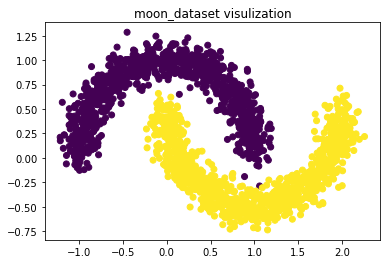

In [74]:
%matplotlib inline
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from node import Node, Graph

# 生成 make_moons 数据集
X, y = make_moons(n_samples=2000, noise=0.1
                  , random_state=42)
# X是每个点的坐标(x, y)，y是每个点的label
nodes = []
index = 0
for df, label in zip(X, y):
    nodes.append(Node(df, label, index))
    index += 1
# scatter
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("moon_dataset visulization")
plt.show()

### 构建邻接矩阵

In [75]:
DISTANCE = 0.5
graph = Graph(nodes, distance=DISTANCE)
adjacency_matrix = graph.get_adjacency_matrix()

#根据邻接矩阵获取所有的二元组，如：[(0, 1), (0, 2), (1, 2)]
edges = graph.get_edges()
print(f"Distance={DISTANCE}, 构建了{len(edges)}条边")

Distance=0.5, 构建了289371条边


### DeepWalk

#### Deepwalk策略定义

In [76]:
# deepwalk的游走策略
import networkx as nx
import gensim
import random

def deepwalk(graph, walk_length = 60, num_walks = 200, dim = 32):
    # 生成随机游走序列
    walks = []
    for _ in range(num_walks):
        node = random.choice(list(graph.nodes))
        walk = [node]
        while len(walk) < walk_length:
            neighbors = list(graph[node])
            next_node = neighbors[random.randint(0, len(neighbors) - 1)] if neighbors else node
            walk.append(next_node)
            node = next_node
        walks.append(walk)
    # print(walks, end = '\n')

    # 使用 gensim 的 Word2Vec 训练嵌入向量
    sentences = [list(map(str, walk)) for walk in walks]
    # for walk in walks:
    #     print(walk)
    # print(sentences)
    model = gensim.models.Word2Vec(sentences, vector_size=dim, window=walk_length, min_count=1, sg=1)
    node2vec = {str(node): model.wv[str(node)] if str(node) in model.wv else None for node in graph.nodes}
    # for node in graph.nodes:
        # print(node, model.wv[str(node)])
    return node2vec

#### Deepwalk嵌入，取两维简单做个可视化

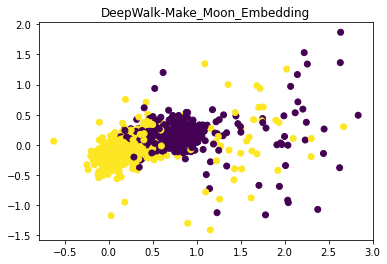

In [77]:
nx = graph.to_nx()
# print(nx.nodes)
embeddings = deepwalk(nx)
# embeddings

# 随便取两个维度看看
x = [embedding[0] for embedding in list(embeddings.values()) if embedding is not None]
y = [embedding[1] for embedding in list(embeddings.values()) if embedding is not None]



label = [node.label for node in nodes if(embeddings[str(node.index)] is not None)]

# 创建散点图
plt.scatter(x, y, c=label)
plt.title("DeepWalk-Make_Moon_Embedding")
# 显示图形
plt.show()

#### PCA降维，降到两维后做可视化

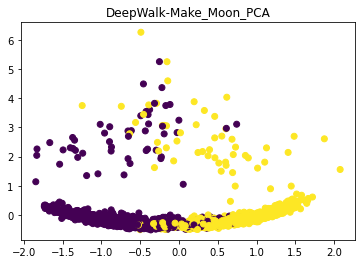

In [78]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 先drop掉None
embeddings = {key: value for key, value in embeddings.items() if value is not None}
# 假设embeddings是一个字典，其中包含嵌入值
embeddings_value = list(embeddings.values())

# 使用PCA进行降维
pca = PCA(n_components=2)
pca.fit(embeddings_value)
X_pca = pca.transform(embeddings_value)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label)
plt.title("DeepWalk-Make_Moon_PCA")
plt.show()


### Node2Vec

#### Node2Vec算法定义

In [79]:
import networkx as nx
import gensim
import random

def node2vec(graph, walk_length=60, num_walks=200, p=1.0, q=1.0, dim=32):
    # Generate random walk sequences
    walks = []
    for _ in range(num_walks):
        node = random.choice(list(graph.nodes))
        walk = [node]
        while len(walk) < walk_length:
            neighbors = list(graph.neighbors(node))
            if len(neighbors) > 0:
                if len(walk) == 1 or random.random() < p:
                    # Choose a neighbor at random with probability P
                    next_node = random.choice(neighbors)
                else:
                    # Choose a neighbor with probability proportional to the inverse of the square of the distance to the previous node
                    weights = [1.0 / q if n == walk[-1] else 1.0 for n in neighbors]
                    next_node = random.choices(neighbors, weights)[0]
                walk.append(next_node)
                node = next_node
            else:
                break
        walks.append(walk)

    # Use gensim's Word2Vec to train embedding vectors
    sentences = [list(map(str, walk)) for walk in walks]
    model = gensim.models.Word2Vec(sentences, vector_size=dim, window=walk_length, min_count=1, sg=1)
    node2vec = {str(node): model.wv[str(node)] if str(node) in model.wv else None for node in graph.nodes}
    return node2vec

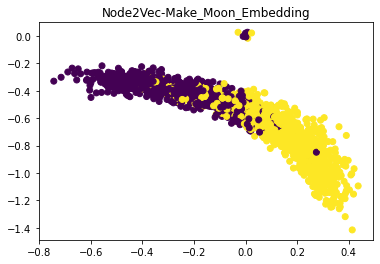

In [80]:
nx = graph.to_nx()
# print(nx.nodes)
embeddings = node2vec(nx)
# embeddings

# 随便取两个维度看看
x = [embedding[0] for embedding in list(embeddings.values()) if embedding is not None]
y = [embedding[1] for embedding in list(embeddings.values()) if embedding is not None]



label = [node.label for node in nodes if(embeddings[str(node.index)] is not None)]

# 创建散点图
plt.scatter(x, y, c=label)
plt.title("Node2Vec-Make_Moon_Embedding")
# 显示图形
plt.show()

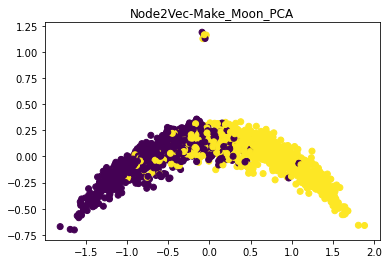

In [81]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 先drop掉None
embeddings = {key: value for key, value in embeddings.items() if value is not None}
# 假设embeddings是一个字典，其中包含嵌入值
embeddings_value = list(embeddings.values())

# 使用PCA进行降维
pca = PCA(n_components=2)
pca.fit(embeddings_value)
X_pca = pca.transform(embeddings_value)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label)
plt.title("Node2Vec-Make_Moon_PCA")
plt.show()


### GIN

### GAT